# Olist - Exploratory Data Analysis

E-commerce (or electronic commerce) refers to transactions conducted via the internet. Every time individuals/companies buy or sell products/services online they're engaging in e-commerce.

Needless to say, e-commerce has been growing rapidly over the years. And the covid pandemic has boosted even more the online sales.

In this project, we'll be exploring a Brazilian e-commerce public dataset of orders made at [Olist Store](https://olist.com/) available on [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce#). The dataset has information on 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.


### Objectives:
- 
- 


### Importing Libraries

In [1]:
import zipfile

import numpy as np
import pandas as pd

# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# seaborn config
sns.set(font_scale=1.2)

## 1. Loading Data
___

The data is divided in multiple datasets (.csv files) for better understanding and organization.

### Datasets Description
- **olist_customers_dataset**: This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location. At our system each order is assigned to a unique `customerid`. This means that the **same customer will get different ids for different orders**. The purpose of having a `customerunique_id` on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.


- **olist_geolocation_dataset**: This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.


- **olist_order_items_dataset**: This dataset includes data about the items purchased within each order.
    - **Example**: The `order_id = 00143d0f86d6fbd9f9b38ab440ac16f5` has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum:
        - The total order_item value is: 21.33 * 3 = 63.99
        - The total freight value is: 15.10 * 3 = 45.30
        - The total order value (product + freight) is: 45.30 + 63.99 = 109.29)


- **olist_order_payments_dataset**: This dataset includes data about the orders payment options.


- **olist_order_reviews_dataset**: This dataset includes data about the reviews made by the customers. After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.


- **olist_orders_dataset**: This is the core dataset. From each order you might find all other information.


- **olist_products_dataset**: This dataset includes data about the products sold by Olist.


- **olist_sellers_dataset**: This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.



### Olist Data Schema
![Data Schema](imgs/data-schema.png)

Each of the datasets presented in the data schema above will be loaded into pandas dataframes:

In [2]:
# Reading the zipfile containing the datasets
zf = zipfile.ZipFile("data/olist-datasets.zip")

# Loading Datasets
customers_df = pd.read_csv(zf.open("olist_customers_dataset.csv"))
geolocation_df = pd.read_csv(zf.open("olist_geolocation_dataset.csv"))
order_items_df = pd.read_csv(zf.open("olist_order_items_dataset.csv"))
order_payments_df = pd.read_csv(zf.open("olist_order_payments_dataset.csv"))
order_reviews_df = pd.read_csv(zf.open("olist_order_reviews_dataset.csv"))
orders_df = pd.read_csv(zf.open("olist_orders_dataset.csv"))
products_df = pd.read_csv(zf.open("olist_products_dataset.csv"))
sellers_df = pd.read_csv(zf.open("olist_sellers_dataset.csv"))

The `product_category_name` column in `olist_products_dataset` has information in Portuguese. But there is a file containing the translations to English.

We'll create a dictionary linking each "original category" (Portuguese) to its corresponding in English:

In [3]:
product_category_translation_dict = pd.read_csv(zf.open("product_category_name_translation.csv"),
                                                header=None, index_col=0, skiprows=1, squeeze=True).to_dict()

## 2. Exploratory Data Analysis
___

As we saw, the data is divided in multiple datasets. Let's start exploring each one of the datasets.

### 2.1 Orders Dataset

This is the "core" dataset.

In [4]:
print(f"Dimensions: {orders_df.shape}")
orders_df.head()

Dimensions: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- **Converting Time Columns to Datetime**

In [6]:
time_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

In [7]:
for col in time_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- **Missing data**

There are some missing values in the columns `order_approved_at`, `order_delivered_carrier_date` and `order_delivered_customer_date`.

This indicates that some of the orders haven't been approved or delivered.

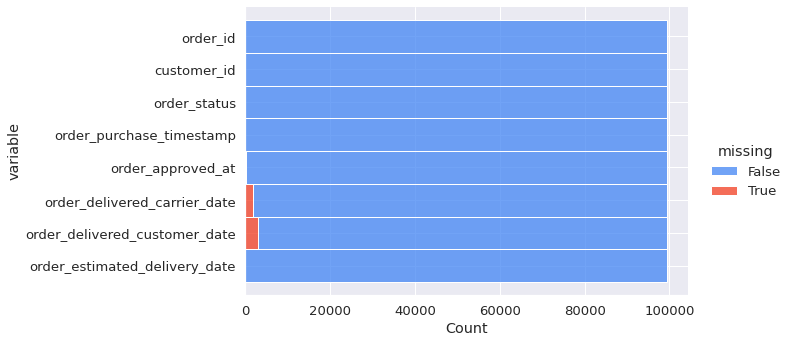

In [8]:
ax = sns.displot(
    data=orders_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette=["#4285F4", "#F13C20"],
    multiple="stack",
    aspect=2
)

- **Unique Values**

Most of the columns are composed of almost 100% unique values. As mentioned before, each order is assigned to a unique `customer_id`, this means that the same customer will get different ids for different orders.

In [162]:
perc_unique_keys = orders_df.nunique() / len(orders_df) * 100
perc_unique_keys = perc_unique_keys.reset_index().\
    rename(columns={0:"Percentage", "index": "Column"}).sort_values(by="Percentage")
fig = px.bar(perc_unique_keys, x="Percentage", y="Column", title="Percentage of Unique Values")
fig.update_traces(hovertemplate="<b>Column</b>: %{y}<br><b>Percentage of Unique Values</b>: %{x}%")
fig.show()

- **Order Status**

There are `8` unique order status and they represent the steps of an order (created > processing > approved > ...).

Most of the orders are labelled as `delivered`, but we can see that there are some "negative" status, such as `canceled` and `unavailable` orders.

In [11]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [166]:
perc_canceled_orders = len(orders_df.query("order_status == 'canceled'")) / len(orders_df) * 100
perc_unavailable_orders = len(orders_df.query("order_status == 'unavailable'")) / len(orders_df) * 100

print(f"> {perc_canceled_orders:.2f}% canceled orders.")
print(f"> {perc_unavailable_orders:.2f}% unavailable orders.")

> 0.63% canceled orders.
> 0.61% unavailable orders.


- **Has online shopping increased over the time?**

In [179]:
window_size = 7
purchase_dates = orders_df[["order_purchase_timestamp"]].copy()
purchase_dates["order_purchase_timestamp"] = purchase_dates["order_purchase_timestamp"].dt.to_period("D")
purchase_dates.set_index("order_purchase_timestamp", inplace=True)
purchase_dates = purchase_dates.resample("D").size().fillna(0).to_frame(name="num_purchases")
purchase_dates["moving_average"] = purchase_dates.rolling(window=window_size, min_periods=0).mean()

# Plot
fig = go.Figure()
fig.add_bar(x=purchase_dates.index.to_timestamp(), 
            y=temp.values,
            hovertemplate="<b>Date:</b> %{x}<br><b># of Purchases:</b> %{y}",
            name="Daily Purchases")
fig.add_trace(go.Scatter(x=purchase_dates.index.to_timestamp(), 
                         y=purchase_dates["moving_average"], 
                         hovertemplate="<b>Date:</b> %{x}<br><b>Moving Average:</b> %{y:.2f}",
                         name="Moving Average"))

As we can see in the graph above, from 2016 to 2018 the number of purchases has **significantly increased**, starting with a few purchases per day and reaching a moving average of 493 purchases at its highest.

- **Is there a month when there are more purchases?**

- **How long does Olist take to deliver a product?**

- **Early or Late Delivery?**